In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_columns", 100)
pd.set_option("max_rows", 100)

### Preparation of Data ###

In [2]:
df = pd.read_csv('Fleet Data.csv')

In [3]:
df.head()

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3


### Cleaning Data ###

In [84]:
df[['Unit Cost', 'Total Cost (Current)']] = df[['Unit Cost', 'Total Cost (Current)']].replace('[\$,]', '', regex=True).astype(float)

In [5]:
df['Average Age'] = df['Average Age'].fillna(0)
df['Average Age'] = df['Average Age'].astype(int)
df = df.sort_values('Average Age' , ascending=False)

In [51]:
selected_airlines = df[(df['Parent Airline'] == 'Delta Airlines') | 
      (df['Parent Airline'] == 'United Airlines') | 
      (df['Parent Airline'] == 'American Airlines')]

I selected airlines based on this website, which categorizes airlines by fleet size. In particular I focused on commercial airlines that have are well-known among the North American public.


https://airportcodes.io/en/blog/top-20-biggest-airlines-by-fleet-size/

### Visualization ###

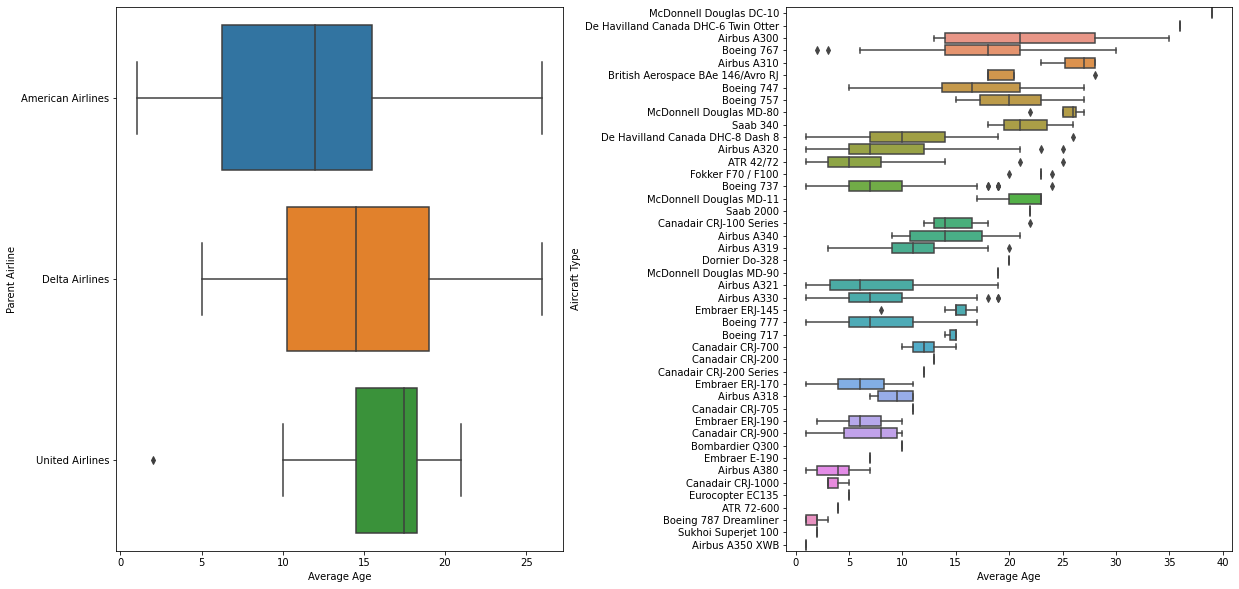

In [52]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
df = df.sort_values('Average Age', ascending=False)
selected_airlines = selected_airlines.sort_values('Average Age', ascending=False)
sns.boxplot(x="Average Age", y="Parent Airline",ax=ax[0], data=selected_airlines[selected_airlines['Average Age'] > 0])
sns.boxplot(x="Average Age", y="Aircraft Type",ax=ax[1], data=df[df['Average Age'] > 0])
plt.subplots_adjust(wspace=0.5)

I was first curious to see which parent airline and what aircraft type had the highest average age. From this boxplot, there seems to be a large variance in age between parent airline. United Airlines has the highest average age, with their fleet being approximately 17 years old on average. 

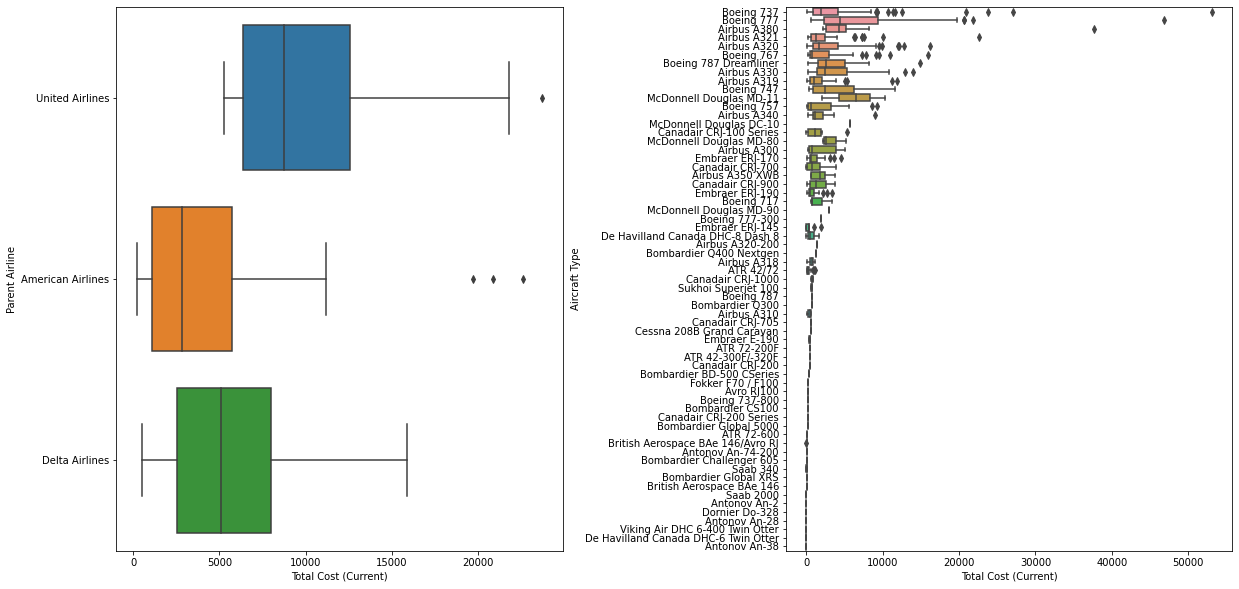

In [53]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
df = df.sort_values('Total Cost (Current)', ascending=False)
selected_airlines = selected_airlines.sort_values('Total Cost (Current)', ascending=False)
sns.boxplot(x="Total Cost (Current)", y="Parent Airline",ax=ax[0], 
            data=selected_airlines[selected_airlines['Total Cost (Current)'] > 0])
sns.boxplot(x="Total Cost (Current)", y="Aircraft Type",ax=ax[1], 
            data=df[df['Total Cost (Current)'] > 0])
plt.subplots_adjust(wspace=0.5)

In addition, looking at the boxplot for total-cost, United Airlines has the highest average total-cost. The Boeing 737 and 777 have outliers that have a high-total cost relative to the mean of their aircraft type.

In [54]:
Boeing = selected_airlines[selected_airlines['Aircraft Type'].str.contains('Boeing')] 

In [55]:
Boeing.head()

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
1503,United Airlines,United Airlines,Boeing 737,321.0,2.0,295.0,620.0,103.0,74.0,23748.0,10
1507,United Airlines,United Airlines,Boeing 777,74.0,14.0,8.0,96.0,14.0,295.0,21797.0,17
366,American Airlines,American Airlines,Boeing 737,282.0,4.0,46.0,332.0,121.0,74.0,20862.0,7
370,American Airlines,American Airlines,Boeing 777,67.0,NaN,NaN,67.0,NaN,295.0,19735.0,12
557,Delta Airlines,Delta Airlines,Boeing 767,85.0,NaN,39.0,124.0,NaN,187.0,15887.0,19


In [56]:
Current = Boeing[['Parent Airline', 'Aircraft Type', 'Current']].copy()
Current.dropna(axis=0, subset=['Current',], inplace=True)
Current['Current'] = Current['Current'].astype(int)

In [57]:
Future = Boeing[['Parent Airline', 'Aircraft Type', 'Future']].copy()
Future.dropna(axis=0, subset=['Future',], inplace=True)
Future['Future'] = Future['Future'].astype(int)

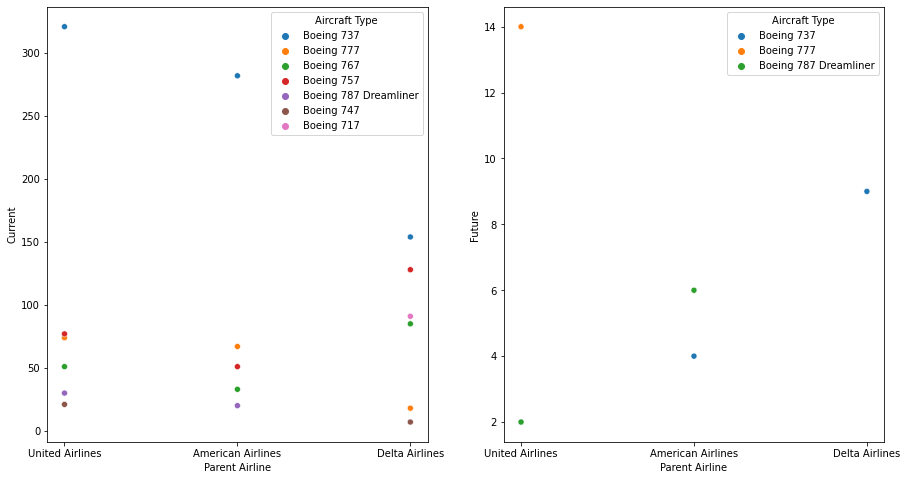

In [82]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.scatterplot(x='Parent Airline', y='Current', hue='Aircraft Type', ax = ax[0], data=Current)
sns.scatterplot(x='Parent Airline', y='Future', hue='Aircraft Type', ax = ax[1], data=Future)
plt.subplots_adjust(wspace=0.2)

On the first plot, I was interested in looking at the distribution of current Boeing aircrafts among the largest airlines. Although this data is from four years ago, it is always interesting to see where airlines invest in with regards to commercial aircrafts. In all major airlines the Boeing 737 has the highest current quantity in operation. 

On the second plot, the y-axis refers to future aircraft quantities on order. What is interesting is that United looks to order more 747 in particular. 